In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
t1t2_features = "./data/oasis/oasis3_anat2vess_cropped_features_aug24_parsed_id.csv"
gt_features = "./data/oasis/oasis3_costa_cropped_features_aug24_parsed_id.csv"

t1t2_df = pd.read_csv(t1t2_features)
gt_df = pd.read_csv(gt_features)

gt_df['sub_id'] = gt_df['sub_id'].str.replace('.nii.gz', '')

merged_df = pd.merge(t1t2_df, gt_df, on='sub_id', suffixes=('_t1t2', '_gt'), how='inner')

In [3]:
fs = pd.read_csv("./data/oasis/oasis3_freesurfer_output.csv")
fs = fs[fs["FS QC Status"]=="Passed"]

In [4]:
merged_df["oasisid_sessionid"] = merged_df["file_t1t2"].apply(lambda x: x.split("sub-")[-1].split("-")[0] + "_" + x.split("-")[-1].split(".")[0])

In [5]:
features_to_compare = [
 {'key':'num_branches', 'title':'Number of Branches', "position": "A"},
 {'key':'total_volume', 'title':'Total Volume ($mm^3$)', "position": "B"},
 {'key':'bifurcations', 'title':'Number of Bifurcations', "position": "C"},
 {'key':'endpoints', 'title':'Number of Endpoints', "position": "D"},
 {'key':'mean_radius', 'title':'Mean Radius (mm)', "position": "E"},
 {'key':'mean_tortuosity', 'title':'Mean Tortuosity', "position": "F"},
 {'key':'total_branch_length', 'title':'Total Branch \n Length (mm)', "position": "G"},
 {'key':'mean_branch_length', 'title':'Mean Branch \n Length (mm)', "position": "H"}]

print(len(features_to_compare))

8


plotting feature: num_branches
plotting feature: total_volume
plotting feature: bifurcations
plotting feature: endpoints
plotting feature: mean_radius
plotting feature: mean_tortuosity
plotting feature: total_branch_length
plotting feature: mean_branch_length


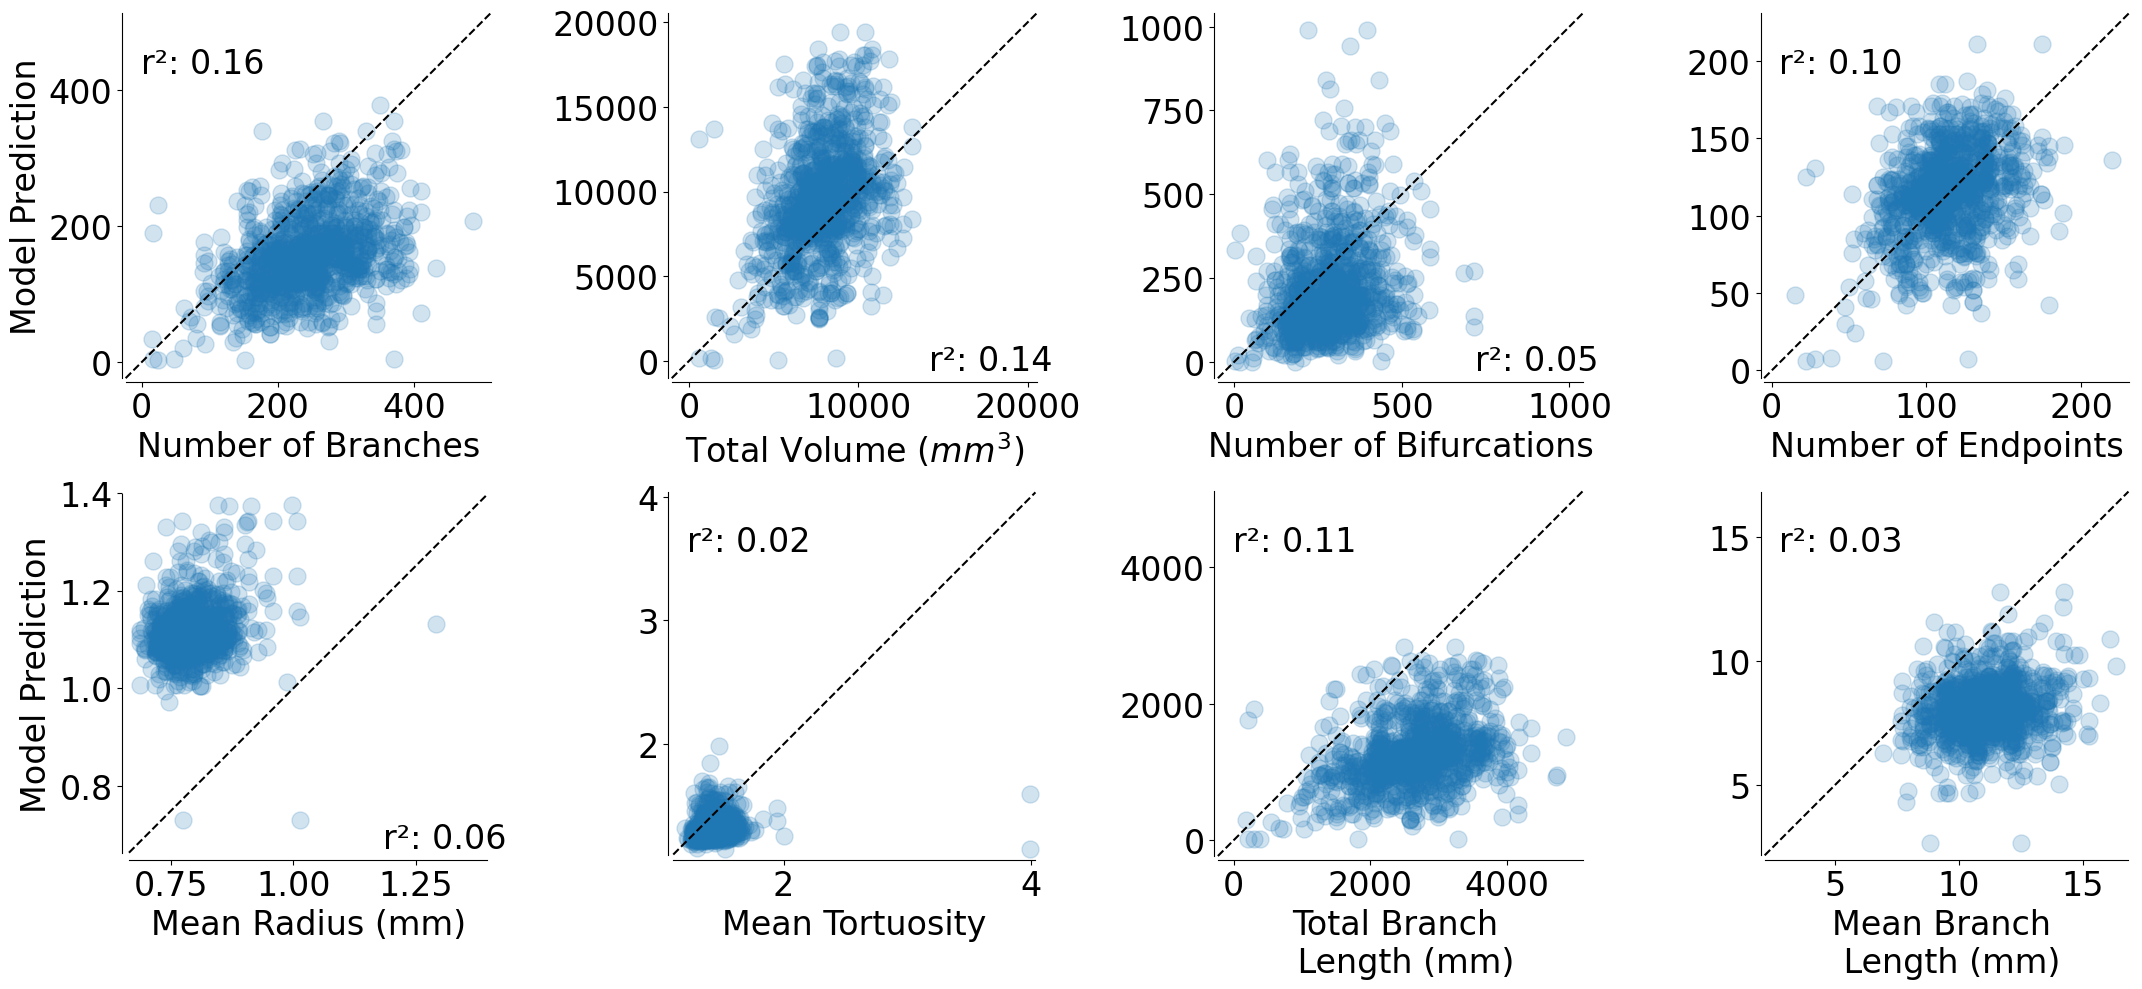

In [6]:
import numpy as np
from sklearn.metrics import r2_score

font_size = 24

def plot_scatter(axs, x, y, feature, title='', set_ylabel=True, text_lr=False):
    min_val = min(x.min(), y.min())
    max_val = max(x.max(), y.max())
    std = np.std(x+y)
    min_val = min_val - (std/4)
    max_val = max_val + (std/4)

    # Compute the correlation coefficient
    correlation = np.corrcoef(x, y)[0, 1]
    r2 = correlation ** 2

    axs.scatter(y, x, alpha=0.2, s=150)
    # axs.text(f"{title}", fontsize=font_size)
    if not text_lr:
        axs.text(0.05, 0.9, f'r²: {r2:.2f}',
                transform=axs.transAxes,
                fontsize=24,
                verticalalignment='top')
    else:
        axs.text(0.7, 0.1, f'r²: {r2:.2f}',
                transform=axs.transAxes,
                fontsize=24,
                verticalalignment='top')

    if set_ylabel:
        axs.set_ylabel('Model Prediction', fontsize=font_size)
    axs.set_aspect('equal', adjustable='box')

    # Set the limits of the axes to fit the data
    axs.set_xlim(min_val-0.01*max_val, max_val+0.01*max_val)
    axs.set_ylim(min_val-0.01*max_val, max_val+0.01*max_val)
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds(min_val, max_val)
    ax.spines['left'].set_bounds(min_val, max_val)
    axs.tick_params(axis='x', labelsize=24)
    axs.tick_params(axis='y', labelsize=24)
    axs.plot([min_val, max_val],
             [min_val, max_val],
             'k--')
    axs.set_xlabel(feature, fontsize=24)

    #axs.set_xticks(np.hstack([axs.get_xlim()[0], axs.get_xticks(), axs.get_xlim()[-1]]))
    #axs.set_yticks([min_val-0.01*max_val] + ax.get_yticks() + [max_val+0.01*max_val])




rows = 2
columns = 4
fig, axs = plt.subplots(rows, columns, figsize=(22, 10))
index = 0
for i in range(rows):
    for j in range(columns):
        ax = axs[i, j]
        set_ylabel = False

        if j == 0:
            set_ylabel = True

        text_lr = False
        if i==0 and j==1:
            text_lr = True
        if i==1 and j==0:
            text_lr = True
        if i==0 and j==2:
            text_lr=True
        feature = features_to_compare[index]['key']
        print('plotting feature:', feature)
        plot_scatter(ax, merged_df[feature+'_t1t2'],
                     merged_df[feature+'_gt'],
                     features_to_compare[index]["title"],
                     title=features_to_compare[index]['position'],
                     set_ylabel=set_ylabel,
                     text_lr=text_lr)
        index += 1

fig.set_tight_layout("tight")